# 1. Load packages

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

or the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

import pandas as pd

42452


See **functions** in the repository for [AnalysisTool_Chromatin](../../../functions/README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

In [24]:
import seaborn as sns
import scanpy as sc

## 1.1 Define output folder

In [3]:
output_main_folder = r'L:\Shiwei\Figures\MOp_draft_2023_v0\Nuclear_organization'
output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')


Use existing analysis folder: L:\Shiwei\Figures\MOp_draft_2023_v0\Nuclear_organization\analysis.
Use existing figure folder: L:\Shiwei\Figures\MOp_draft_2023_v0\Nuclear_organization\figures.


## 1.2 setting up plotting parameters

In [25]:
sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=150, dpi_save=300, frameon=False, 
                              figsize=(4, 4), fontsize=8, facecolor='white', transparent=True)
sc.settings.figdir = output_figure_folder

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# 2. Load codebook and chr2Zxys

## Codebook

See **codebook** example from [codebook](../../0_locus_annotation/resources/MERFISH_loci_adjacent_genes_tss_more_res.csv)

In [5]:
# load codebook
# L drive is Crick Pu_SSD_0
codebook_save_folder=r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin\resources'

# Load sorted codebook (allows direct matrix slicing) with cell type info
# Load codebook (then sort to allow direct matrix slicing) with cell type info

codebook_fname = os.path.join(codebook_save_folder,'MERFISH_loci_adjacent_genes_tss_more_res.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df temporailiy so matrix can be sliced by df order directly
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)

codebook_df.head()

,name,id,chr,chr_order,library,dtype,adjacent_genes_0kb_tss,adjacent_genes_10kb_tss,adjacent_genes_50kb_tss,adjacent_genes_100kb_tss,adjacent_genes_200kb_tss,adjacent_genes_500kb_tss,adjacent_genes_1000kb_tss,adjacent_genes_1500kb_tss,adjacent_genes_2000kb_tss
loci_name,,,,,,,,,,,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0,CTP11,combo,intergenic,intergenic,intergenic,Xkr4,Xkr4,Gm18956; Gm7341; Xkr4,Gm18956; Gm2053; Gm6085; Gm6101; Gm6119; Gm734...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...,Atp6v1h; Gm16041; Gm17101; Gm18956; Gm2053; Gm...
chr1_6245958_6258969,1:6245958-6258969,2,1,1,CTP11,combo,intergenic,intergenic,4732440D04Rik; Rb1cc1,4732440D04Rik; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Rb1cc1,4732440D04Rik; Gm19026; Gm2147; Npbwr1; Rb1cc1...,4732440D04Rik; Gm19026; Gm2147; Gm5694; Gm7182...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...,4732440D04Rik; Atp6v1h; Gm16041; Gm17101; Gm19...
chr1_8740008_8759916,1:8740008-8759916,3,1,2,CTP11,combo,intergenic,intergenic,Gm15452,Gm15452,Gm15452,Gm15452,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm15452;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...
chr1_9627926_9637875,1:9627926-9637875,1,1,3,CTP13,combo,2610203C22Rik,2610203C22Rik,2610203C22Rik,2610203C22Rik; Adhfe1; Gm6161; Mybl1; Rrs1,1700034P13Rik; 2610203C22Rik; Adhfe1; Gm18300;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Cops5; C...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...
chr1_9799472_9811359,1:9799472-9811359,2,1,4,CTP13,combo,Gm6195,Gm6195; Sgk3,Gm6195; Sgk3,1700034P13Rik; Gm6195; Mcmdc2; Mybl1; Sgk3; Vc...,1700034P13Rik; 2610203C22Rik; Gm6195; Mcmdc2; ...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; Adhfe1; Arfgef1;...,1700034P13Rik; 2610203C22Rik; A830018L16Rik; A...


## Chr2Zxys dict and medianDict

The below can be generated using jupyter notebook as below:

[preprocess/2_dna_merfish/scripts/2_spot_pick/4_summarize_jie_to_dict](../../../preprocess/2_dna_merfish/scripts/2_spot_pick/4_summarize_jie_to_dict.ipynb)

In [6]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_20230201\MOp_WT_postanalysis\postanalysis_vCW2_sorted'
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

In [7]:
subclass_2_chr2ZxysList.keys()

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])

In [8]:
# subclass info
subclass_2_cellInfoList_filename = os.path.join(postanalysis_folder, 'subclass_2_cellInfo.pkl')
subclass_2_cellInfoList = pickle.load(open(subclass_2_cellInfoList_filename, 'rb'))

# 3. Calculate convex hull for cell (dataframe version)

## Define functions

In [9]:
from scipy.spatial.distance import euclidean, cdist, pdist
from scipy.spatial import ConvexHull

In [10]:
# quick get cell pts as zxy arr
def chrZXY_to_cell_pts_arr (chrZxysList_cell:dict):
    cell_pts = []
    for _chrom, _chr_zxys in chrZxysList_cell.items():
        for _fiberidx, _ichr_zxys in enumerate(_chr_zxys):
            cell_pts.extend(_ichr_zxys)
    return cell_pts
    
# generate cell pts df with region names
from AnalysisTool_Chromatin import loci_1d_features
importlib.reload(loci_1d_features)  

def chrZXY_to_cell_pts_dataframe (chrZxysList_cell:dict, 
                                  codebook_df:pd.core.frame.DataFrame, 
                                  cellgroup = 'None'):
    
    output_df_list = []
    for _chrom, _chr_zxys in chrZxysList_cell.items():
        for _fiberidx, _ichr_zxys in enumerate(_chr_zxys):
            _fiber_df = pd.DataFrame(_ichr_zxys,columns = ['z','x','y'],dtype=np.float64)
            _fiber_df['chr']=_chrom
            _fiber_df['fiberidx']=_fiberidx+1
            # get other info from codebook
            _info_df = codebook_df[codebook_df['chr']==_chrom].copy(deep=True)
            _info_df = loci_1d_features.sort_loci_df_by_chr_order(_info_df)
            _info_df['chr_order'] = _info_df['chr_order'].map(lambda x: int(x))
            _info_df.reset_index(inplace=True) # rest index to match so cols can be assigned
            if len(_info_df) == len(_fiber_df):
                _fiber_df[['name','chr_order']]=_info_df[['name','chr_order']]
            else:
                print ('Number of loci does NOT match between input dict and codebook.')
                #return None
            output_df_list.append(_fiber_df)
    
    output_df = pd.concat(output_df_list)
    output_df['celltype']=cellgroup
    return output_df

In [11]:
def cell_volume_by_chrZxys_dataframe (chr_2_zxys_list, cell_infoList_class,
                                 verbose=False):
    
    from scipy.spatial import ConvexHull
    
    # init dict and list to store results
    _out_cell_dict = {'uid': {},
               'subclass': {},      
           'nucleus_volume': {},
           'total_spots': {},
                     }
    
    # loop through cells
    for _cell_idx, _cell_chr_2_zxys_dict in enumerate(chr_2_zxys_list):
        
        _out_cell_dict['uid'][_cell_idx] = cell_infoList_class[_cell_idx]['uid']
        _out_cell_dict['subclass'][_cell_idx] = cell_infoList_class[_cell_idx]['subclass']
        # init list to combine all chrZxy
        combined_cell_chrZxy_list=[]
        # loop through chr
        for _chr_key, _chr_zxys in _cell_chr_2_zxys_dict.items():
            # loop through haploid
            for _ichr_zxys in _chr_zxys:
                # add each zxy
                for _zxys in _ichr_zxys:
                    combined_cell_chrZxy_list.append(_zxys)
        # use all non-nan points to calculate convex hull            
        nonnan_index =np.where(np.sum(~np.isnan(combined_cell_chrZxy_list)>0,axis=1))
        total_spots_num = len(nonnan_index[0])
        _out_cell_dict['total_spots'][_cell_idx] = total_spots_num
        # convex hull
        points=np.array(combined_cell_chrZxy_list)[nonnan_index]
        hull = ConvexHull(points)  
        _out_cell_dict['nucleus_volume'][_cell_idx]=hull.volume

    _out_cell_df = pd.DataFrame(_out_cell_dict)
    _out_cell_df.set_index('uid', drop=True,inplace=True)

    return _out_cell_df

## Process

In [13]:
import tqdm
_out_cell_df_list = []

for _class, chr_2_zxys_list in tqdm.tqdm(subclass_2_chr2ZxysList.items()):
    
    print (f'Analyze cell hull volume for {_class}', end=' ')
    cell_infoList_class = subclass_2_cellInfoList[_class]
    
    _start_time = time.time()
    _out_cell_df = cell_volume_by_chrZxys_dataframe (chr_2_zxys_list, cell_infoList_class)
    _out_cell_df_list.append(_out_cell_df)
    print(f"in {time.time()-_start_time:.3f}s.")
    
merged_cell_volume_df = pd.concat(_out_cell_df_list)
merged_cell_volume_df


  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

Analyze cell hull volume for Oligo 


  5%|███▉                                                                               | 1/21 [00:20<06:56, 20.84s/it]

in 20.840s.
Analyze cell hull volume for L5 IT 


 10%|███████▉                                                                           | 2/21 [00:29<04:22, 13.81s/it]

in 8.893s.
Analyze cell hull volume for Micro 


 14%|███████████▊                                                                       | 3/21 [00:35<02:58,  9.94s/it]

in 5.321s.
Analyze cell hull volume for Peri 


 19%|███████████████▊                                                                   | 4/21 [00:37<02:01,  7.15s/it]

in 2.877s.
Analyze cell hull volume for Endo 


 24%|███████████████████▊                                                               | 5/21 [00:46<02:04,  7.79s/it]

in 8.920s.
Analyze cell hull volume for Astro 


 29%|███████████████████████▋                                                           | 6/21 [00:58<02:14,  8.96s/it]

in 11.233s.
Analyze cell hull volume for OPC 


 33%|███████████████████████████▋                                                       | 7/21 [01:02<01:42,  7.33s/it]

in 3.970s.
Analyze cell hull volume for L6 CT 


 38%|███████████████████████████████▌                                                   | 8/21 [01:19<02:16, 10.50s/it]

in 17.286s.
Analyze cell hull volume for L5 ET 


 43%|███████████████████████████████████▌                                               | 9/21 [01:23<01:41,  8.43s/it]

in 3.879s.
Analyze cell hull volume for L5/6 NP 


 48%|███████████████████████████████████████                                           | 10/21 [01:25<01:12,  6.55s/it]

in 2.329s.
Analyze cell hull volume for Pvalb 


 52%|██████████████████████████████████████████▉                                       | 11/21 [01:29<00:57,  5.73s/it]

in 3.869s.
Analyze cell hull volume for L6 IT 


 57%|██████████████████████████████████████████████▊                                   | 12/21 [01:36<00:55,  6.18s/it]

in 7.198s.
Analyze cell hull volume for Lamp5 


 62%|██████████████████████████████████████████████████▊                               | 13/21 [01:38<00:38,  4.76s/it]

in 1.491s.
Analyze cell hull volume for L6b 


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [01:41<00:29,  4.24s/it]

in 3.052s.
Analyze cell hull volume for Sst 


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [01:44<00:23,  3.84s/it]

in 2.901s.
Analyze cell hull volume for SMC 


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [01:45<00:15,  3.14s/it]

in 1.527s.
Analyze cell hull volume for L4/5 IT 


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [01:55<00:20,  5.16s/it]

in 9.834s.
Analyze cell hull volume for L2/3 IT 


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [02:05<00:20,  6.71s/it]

in 10.332s.
Analyze cell hull volume for Vip 


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [02:06<00:10,  5.05s/it]

in 1.172s.
Analyze cell hull volume for Sncg 


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [02:07<00:03,  3.67s/it]

in 0.443s.
Analyze cell hull volume for VLMC 

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:08<00:00,  6.12s/it]

in 1.050s.


,subclass,nucleus_volume,total_spots
uid,,,
259202492748634617304623818845147108919,Oligo,255.043678,863
336074706103419484501535095917410831417,Oligo,298.589934,1426
179117357717369278884189379535888871018,Oligo,305.797609,1601
36321914521561890358202806077673807953,Oligo,76.777445,210
92271180002801802991585284299263797402,Oligo,376.983590,2034
...,...,...,...
89559371323596133331060964655277765256,VLMC,183.802964,584
144314319466287448491677682735506973,VLMC,92.940088,387
71119619609696733523981100580894538756,VLMC,237.601248,734


## Save

In [14]:
output_fname = os.path.join(output_analysis_folder, f'nucleus_volume_convexhull_bysubclass.csv')

merged_cell_volume_df.to_csv(output_fname)

## Load

In [15]:
output_fname = os.path.join(output_analysis_folder, f'nucleus_volume_convexhull_bysubclass.csv')

merged_cell_volume_df = pd.read_csv(output_fname, index_col=0)
merged_cell_volume_df

,subclass,nucleus_volume,total_spots
uid,,,
259202492748634617304623818845147108919,Oligo,255.043678,863
336074706103419484501535095917410831417,Oligo,298.589934,1426
179117357717369278884189379535888871018,Oligo,305.797609,1601
36321914521561890358202806077673807953,Oligo,76.777445,210
92271180002801802991585284299263797402,Oligo,376.983590,2034
...,...,...,...
89559371323596133331060964655277765256,VLMC,183.802964,584
144314319466287448491677682735506973,VLMC,92.940088,387
71119619609696733523981100580894538756,VLMC,237.601248,734


## Plot

In [17]:
np.unique(merged_cell_volume_df['subclass'])

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip'], dtype=object)

In [46]:
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5',
                           'Astro','Oligo','OPC','Micro','Endo','Peri', 
                           
                          ]

celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


sel_merged_cell_volume_df = merged_cell_volume_df[merged_cell_volume_df['subclass'].isin(selected_cell_labels)]

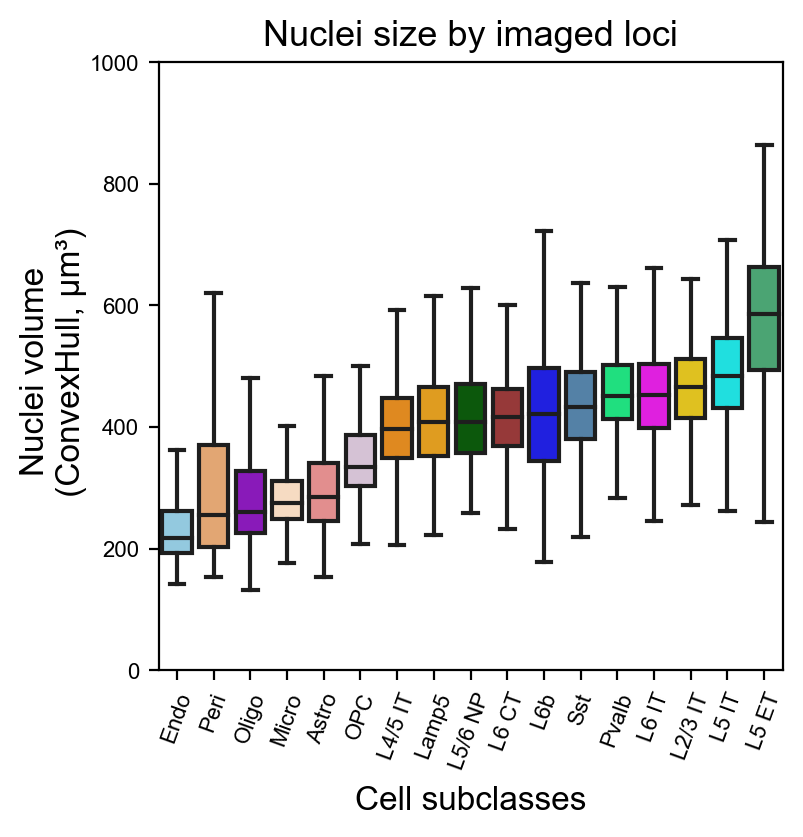

In [96]:
%matplotlib inline

import seaborn as sns
import scanpy as sc
min_pts_th =1250


# sort plotting order by meadian of groups
df_plot = sel_merged_cell_volume_df[sel_merged_cell_volume_df['total_spots']>=min_pts_th]
df_plot_median = pd.DataFrame(df_plot.groupby(by='subclass')['nucleus_volume'].median())
df_plot_median = df_plot_median.sort_values(by='nucleus_volume')
sorted_cellplot_order = df_plot_median.index

# plot
fig, ax = plt.subplots(dpi=100)

sns.boxplot(data=df_plot, x='subclass', y='nucleus_volume', 
            order = sorted_cellplot_order, 
            ax=ax, 
            fliersize=0,
            palette=celltype_palette)

ax.tick_params(axis='x', rotation=70)

ax.set_title(f"Nuclei size by imaged loci", fontsize=13, y=1)
ax.set_xlabel("Cell subclasses", fontsize=12, labelpad=5)
ax.set_ylabel("Nuclei volume \n (ConvexHull, \u03bcm\u00b3)", fontsize=12, labelpad=1)



ax.set_ylim([0,1000])
ax.grid(False)

plt.show()